#CNN

**Using Augmentation to Avoid Overfitting**

In [ ]:
!pip install tensorflow

Libraries I used

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


Preparing the images so that I can run the CNN model on them

In [ ]:
# Paths to the data
train_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/New_Photos1/train'
test_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/New_Photos1/test'

# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,  # Rotate images up to 40 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear images by up to 20%
    zoom_range=0.2,  # Zoom into images by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill new pixels with the nearest value
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


The cnn model that worked best for me - with 3 layers and dropout = 0.5

In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Running the model on the training group

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/20
29/29 [==============================] - 300s 10s/step - loss: 1.1788 - accuracy: 0.5083 - val_loss: 0.5832 - val_accuracy: 0.8097
Epoch 2/20
29/29 [==============================] - 79s 3s/step - loss: 0.6767 - accuracy: 0.7108 - val_loss: 0.4276 - val_accuracy: 0.7965
Epoch 3/20
29/29 [==============================] - 67s 2s/step - loss: 0.5601 - accuracy: 0.7831 - val_loss: 0.3581 - val_accuracy: 0.8496
Epoch 4/20
29/29 [==============================] - 73s 2s/step - loss: 0.5028 - accuracy: 0.8142 - val_loss: 0.2954 - val_accuracy: 0.8938
Epoch 5/20
29/29 [==============================] - 67s 2s/step - loss: 0.4847 - accuracy: 0.8420 - val_loss: 0.4092 - val_accuracy: 0.8186
Epoch 6/20
29/29 [==============================] - 67s 2s/step - loss: 0.4720 - accuracy: 0.8265 - val_loss: 0.3389 - val_accuracy: 0.8407
Epoch 7/20
29/29 [==============================] - 68s 2s/step - loss: 0.4468 - accuracy: 0.8354 - val_loss: 0.2132 - val_accuracy: 0.9115
Epoch 8/20
29/29 [

**accuracy**

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

8/8 [==============================] - 4s 461ms/step - loss: 0.2096 - accuracy: 0.8805
Test accuracy: 88.05%


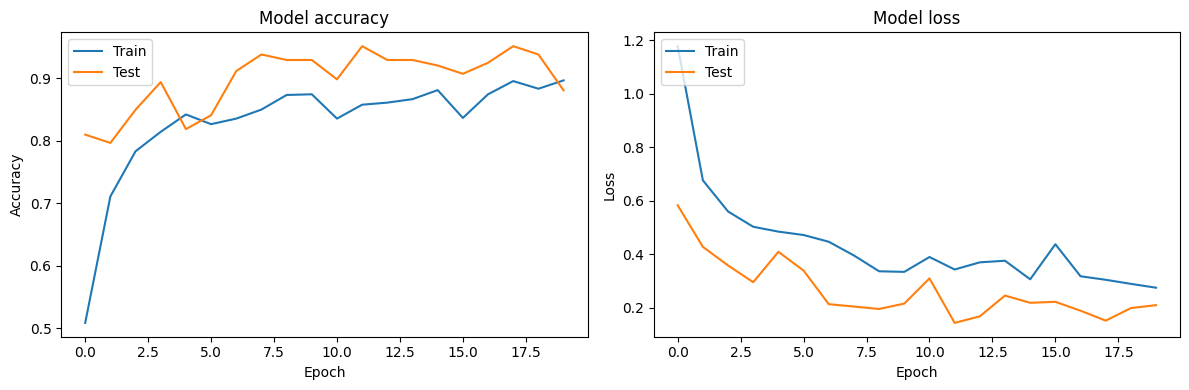

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

It seems that adding augmentation decreased the fit and prediction, but improved the overfit.

I got accuracy 0.88